In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (5,5), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,466 (91.66 KB)

 Trainable params: 23,466 (91.66 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
mnist = keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original = test_label
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

In [3]:
train_history = model.fit(train_data, train_label, epochs = 10, batch_size = 512)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6740 - loss: 13.8402
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9502 - loss: 0.3919
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9708 - loss: 0.1430
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9798 - loss: 0.0859
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9853 - loss: 0.0534
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9882 - loss: 0.0388
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9905 - loss: 0.0329
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9932 - loss: 0.0237
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9941 - loss: 0.0186
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9944 - loss: 0.0162


In [4]:
score = model.evaluate(test_data, test_label)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.1488
0.9786999821662903


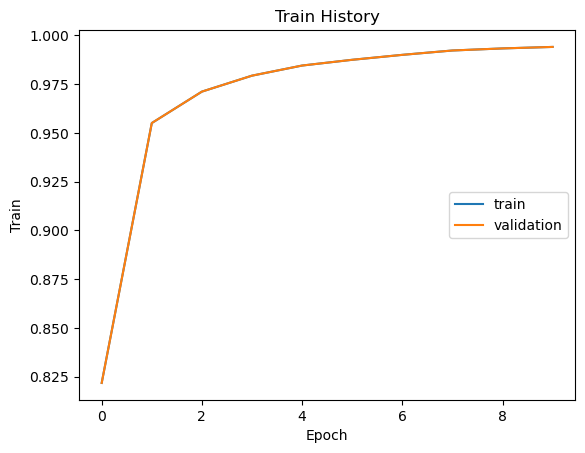

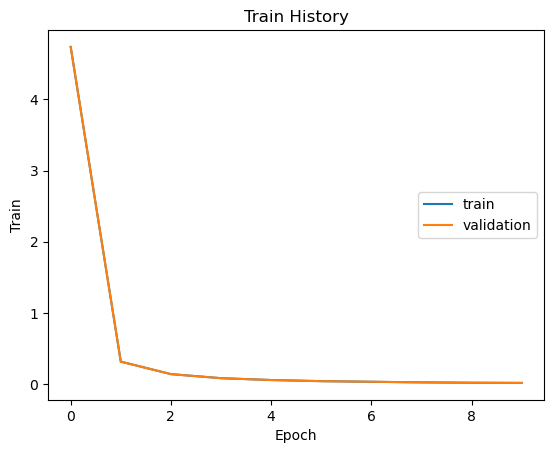

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,958,1,2,0,1,0,7,2,5,4
1,0,1122,6,0,1,1,1,1,3,0
2,0,1,1012,3,1,0,3,6,6,0
3,0,0,3,997,0,6,0,2,1,1
4,0,1,0,0,957,0,3,2,2,17
5,1,0,0,8,0,877,2,0,2,2
6,1,2,0,1,2,5,944,0,3,0
7,0,7,10,3,1,0,0,993,2,12
8,5,1,6,3,2,6,3,1,941,6


In [5]:
# 繪製正確性與損失歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix 混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label = np.argmax(prediction, axis = 1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames = ['label'], colnames = ['predict'])